<a href="https://colab.research.google.com/github/Onmang/Multimedia_engineering/blob/master/t20me022_0630_sm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install soundfile

In [2]:
import numpy as np  # 配列処理に使用
from matplotlib import pyplot as plt # 描画用
from scipy import signal # 信号処理用（フィルタ）
from scipy.io import wavfile # wavファイル読み込み用
from scipy.fftpack import fft, fftfreq  # フーリエ変換（FFT）
import librosa # MFCC計算用

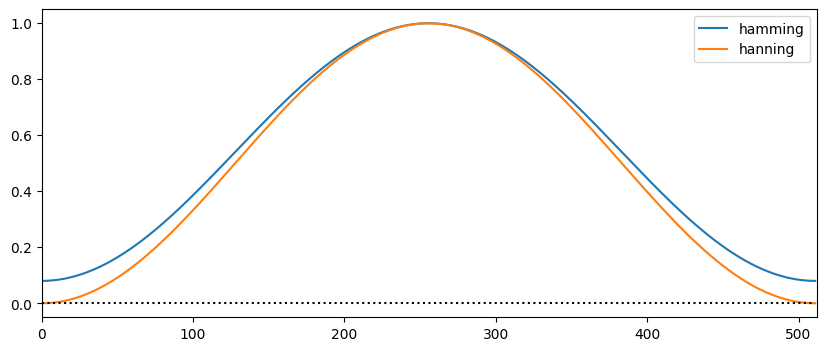

In [14]:
# 窓関数の説明用
hm = signal.hamming(512) # ハミング窓
hn = signal.hann(512) # ハン窓
#rect = [] #
#for i in range(-50, 1074):
#  rect.append(0) if i < 0 or i > 1023 else rect.append(1.0)
#rect = np.array(rect)
#print(rect)
y = np.zeros(512) # y=0の軸描画用データ
x = np.arange(0, 512)
plt.figure(figsize=(10, 4))
plt.plot(hm, label='hamming')
plt.plot(hn, label='hanning')
#plt.plot(x, rect, label='rect')
plt.plot(x, y, 'black', linestyle='dotted')
plt.xlim(0, 512) # 描画範囲の指定
plt.legend()

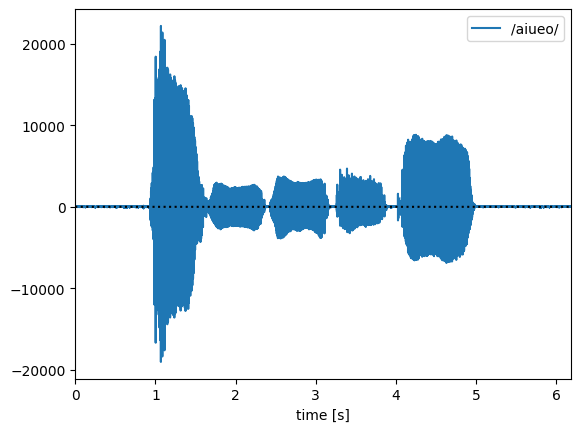

In [5]:
# 波形データを確認する
from scipy.io import wavfile
sr, data = wavfile.read('/content/sample_data/aiueo.wav') # wavファイルをオープン。戻り値はNumPy配列とサンプリング周波数。
t = np.arange(0, len(data)) / sr # 1点あたりの秒を計算（グラフの横軸の生成）
plt.plot(t, data, label='/aiueo/')
plt.plot(t, [0 for _ in range(len(data))], color='black', linestyle='dotted')
plt.xlabel('time [s]')
plt.xlim(0, np.max(t))
plt.legend()
plt.show()

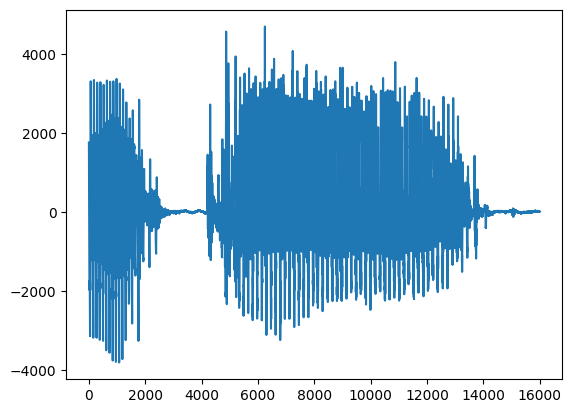

In [8]:
x = data[48000:64000]
x.shape
plt.plot(x)

<Figure size 1200x1000 with 0 Axes>

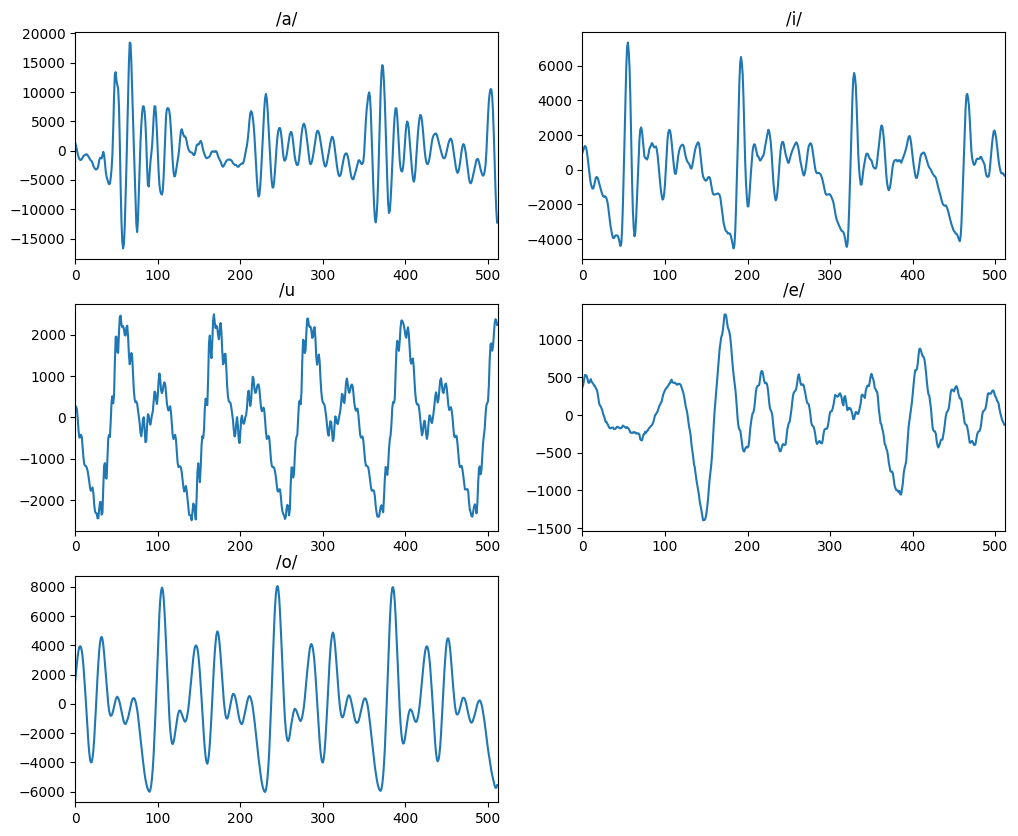

In [19]:
# 母音毎の切り出しと描画
plt.figure(figsize=(12, 10)) # 描画用キャンバス
a = data[16000:16512] # /a/の音声を512点分取り出す
i = data[24000:24512] # /i/の音声を512点分取り出す
u = data[30000:30512] # /u/の音声を512点分取り出す
e = data[50000:50512] # /e/の音声を512点分取り出す
o = data[70000:70512] # /o/の音声を512点分取り出す

plt.figure(figsize=(12, 10)) # 描画用キャンバス
label = ['/a/', '/i/', '/u', '/e/', '/o/']
for j, x in enumerate([a, i, u ,e , o]):
    plt.subplot(3, 2, j+1)
    plt.plot(x)
    plt.xlim(0, 512) # 描画範囲の指定
    plt.title(f'{label[j]}')
plt.show()

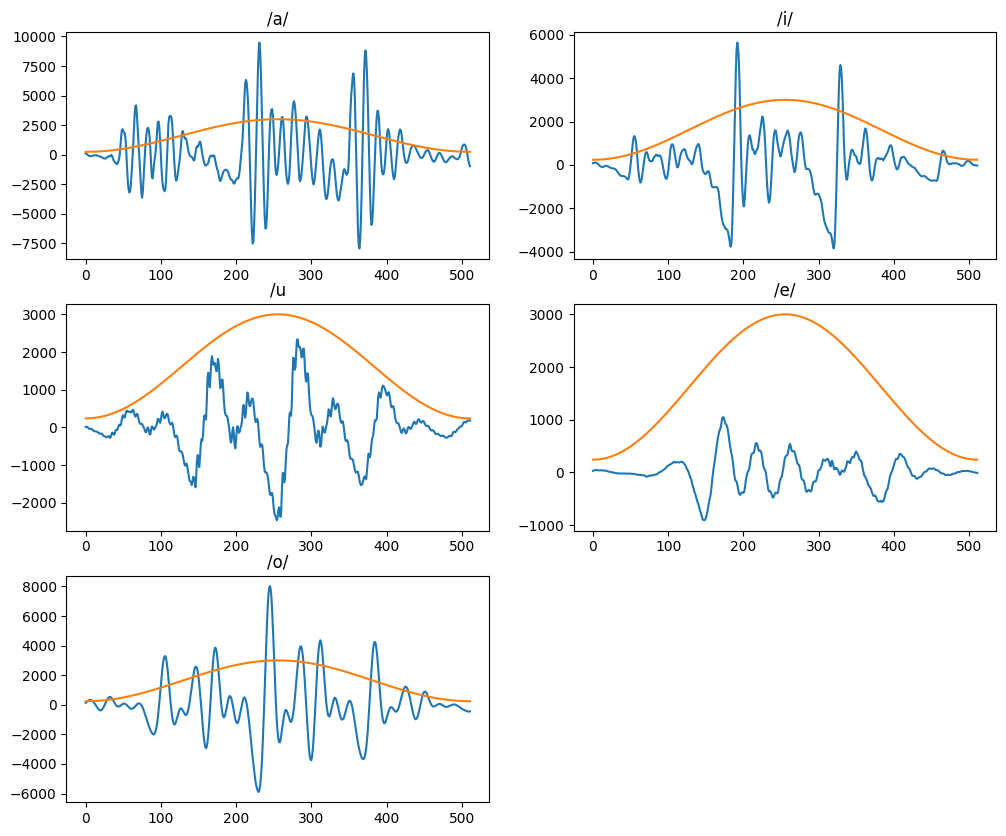

In [20]:
# 窓掛けと描画
plt.figure(figsize=(12, 10)) # 描画用キャンバス
label = ['/a/', '/i/', '/u', '/e/', '/o/']
for j, x in enumerate([a, i, u, e, o]):
    windowx = x * hm #ハミング窓掛け
    plt.subplot(3, 2, j+1)
    plt.plot(windowx)
    plt.plot(hm*3000)
    plt.title(f'{label[j]}')
plt.show()

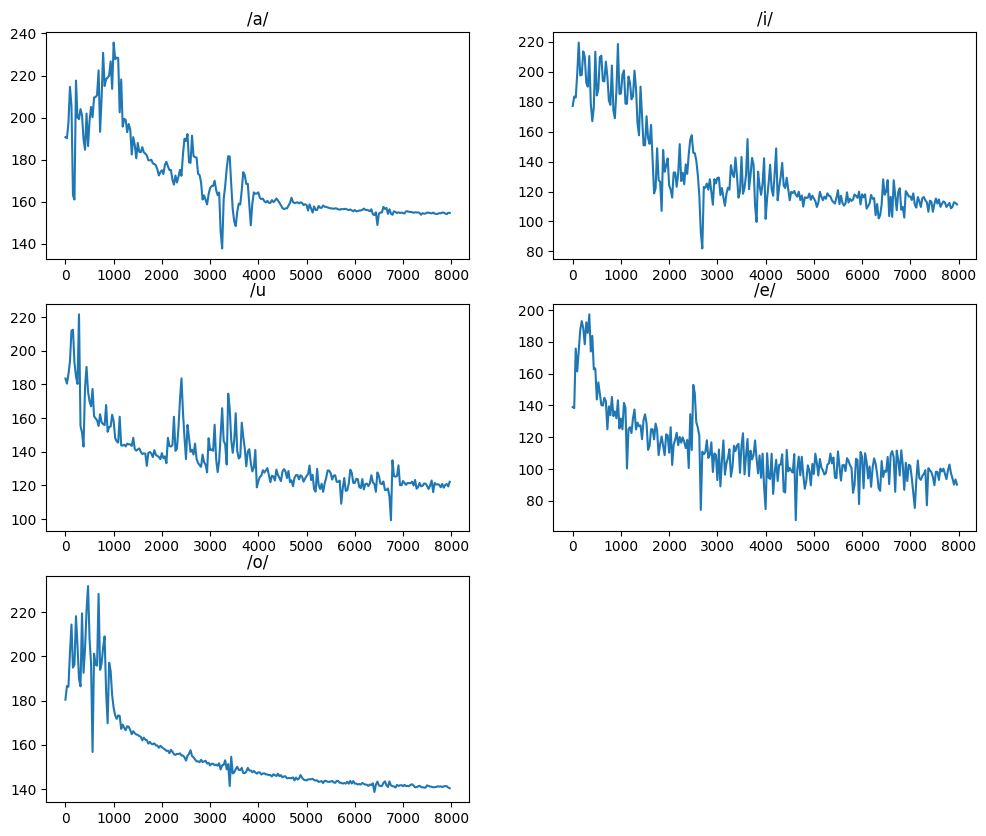

In [21]:
plt.figure(figsize=(12, 10)) # 描画用キャンバス
label = ['/a/', '/i/', '/u', '/e/', '/o/']
xaxis = np.arange(0, 256) * 8000 / 256 # 横軸は周波数軸
for j, x in enumerate([a, i, u, e, o]):
    F = np.fft.fft(x) # フーリエ変換
    S = 20 * np.log10(np.abs(F)**2) # パワー化（実部と虚部の値を自乗して足して，平方根をとる）→対数をとって20をかけるとデシベルの単位になる
    plt.subplot(3, 2, j+1)
    plt.plot(xaxis, S[0:256]) # 折返しになるので，半分の次元までのデータを使う
    plt.title(f'{label[j]}')

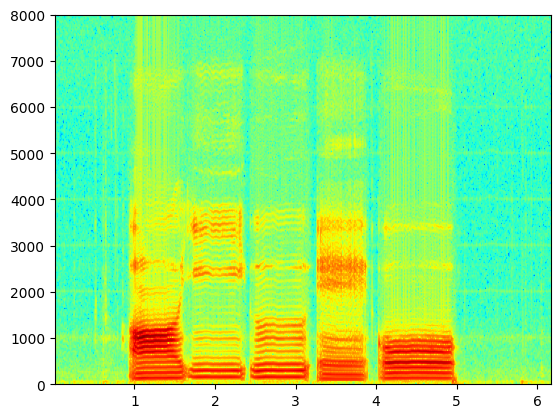

In [22]:
# スペクトログラムの表示
pxx, freq, bins, t = plt.specgram(data, NFFT=512, Fs=16000, window=np.hamming(512), noverlap=352, cmap='jet')
plt.show()

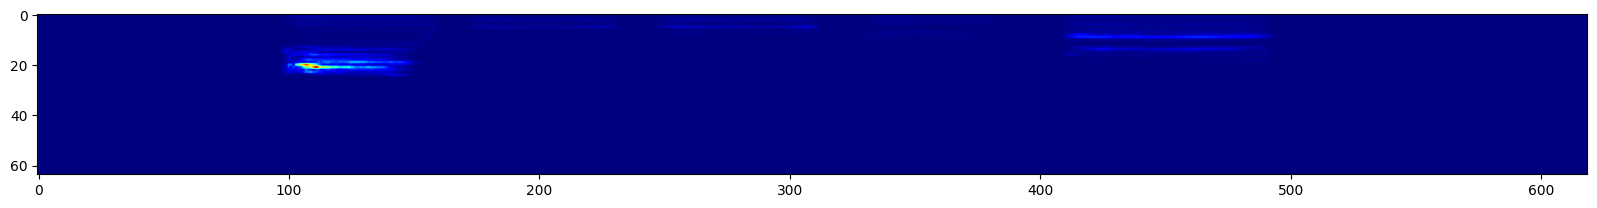

In [25]:
mels = librosa.feature.melspectrogram(y=np.float32(data), sr=sr, n_mels=64, n_fft=512, hop_length=160) #メルスペクトログラムの計算
plt.figure(figsize=(20, 20))
plt.imshow(mels, cmap='jet')